# Navie Bayes For Spam Classification


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [3]:
# Load the dataset
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Add a binary column 'spam'
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.25, random_state=42)

In [6]:
# Define the pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

# Fit the model
clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

In [7]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [8]:
# Print the metrics
print(f'Model accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Model accuracy: 0.9885139985642498
Precision: 0.9775280898876404
Recall: 0.9354838709677419
F1 Score: 0.956043956043956


In [9]:
# Print detailed classification report
report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'])
print(report)

              precision    recall  f1-score   support

    Not Spam       0.99      1.00      0.99      1207
        Spam       0.98      0.94      0.96       186

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [10]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

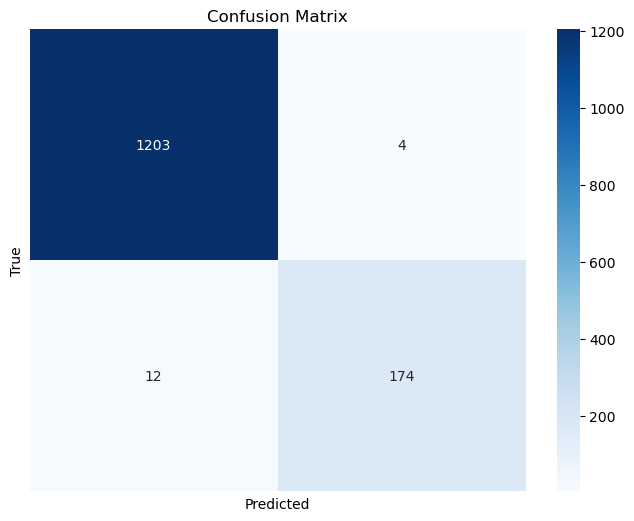

In [13]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[], yticklabels=[])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Example emails for prediction
emails = [
    'Hey mohan, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

# Predict using the pipeline
predictions = clf.predict(emails)
print(f'Predictions for example emails: {predictions}')

Predictions for example emails: [0 1]


# KNN for Spam Classification

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [6]:
# Load the dataset
df = pd.read_csv('spam.csv')
df.head()



,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# Add a binary column 'spam'
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.25, random_state=42)

In [9]:
# Define the pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Fit the model
clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

In [10]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [11]:
# Print the metrics
print(f'Model accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Model accuracy: 0.923905240488155
Precision: 1.0
Recall: 0.43010752688172044
F1 Score: 0.6015037593984962


In [12]:
# Print detailed classification report
report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'])
print(report)


              precision    recall  f1-score   support

    Not Spam       0.92      1.00      0.96      1207
        Spam       1.00      0.43      0.60       186

    accuracy                           0.92      1393
   macro avg       0.96      0.72      0.78      1393
weighted avg       0.93      0.92      0.91      1393



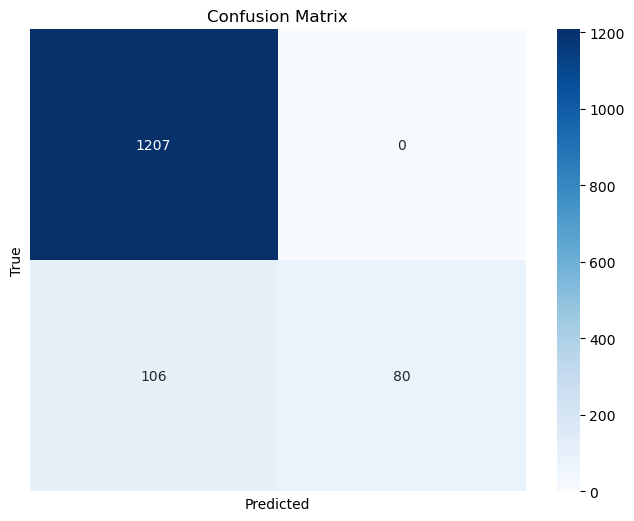

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[], yticklabels=[])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Example emails for prediction
emails = [
    'Hey mohan, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

# Predict using the pipeline
predictions = clf.predict(emails)
print(f'Predictions for example emails: {predictions}')

Predictions for example emails: [0 0]


# Decision Tree for Spam Classification

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [30]:
# Load the dataset
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
# Add a binary column 'spam'
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.25, random_state=42)

In [33]:
# Define the pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Fit the model
clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

In [34]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [35]:
# Print the metrics
print(f'Model accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Model accuracy: 0.9727207465900933
Precision: 0.9252873563218391
Recall: 0.8655913978494624
F1 Score: 0.8944444444444444


In [36]:
# Print detailed classification report
report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'])
print(report)

              precision    recall  f1-score   support

    Not Spam       0.98      0.99      0.98      1207
        Spam       0.93      0.87      0.89       186

    accuracy                           0.97      1393
   macro avg       0.95      0.93      0.94      1393
weighted avg       0.97      0.97      0.97      1393



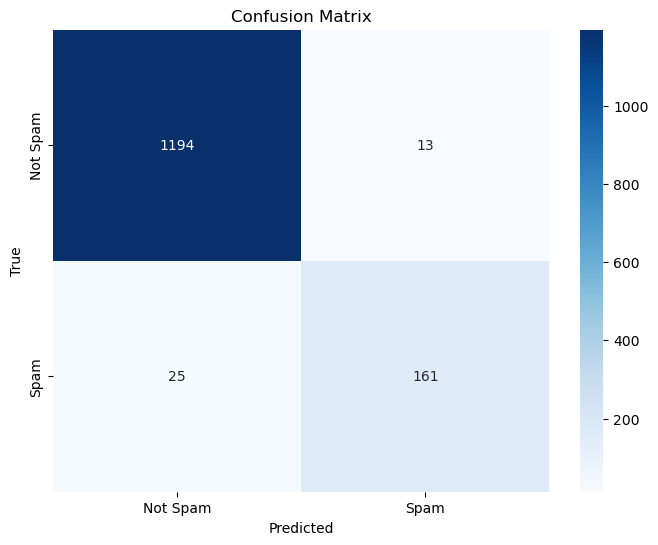

In [37]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [38]:
# Example emails for prediction
emails = [
    'Hey mohan, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

# Predict using the pipeline
predictions = clf.predict(emails)
print(f'Predictions for example emails: {predictions}')

Predictions for example emails: [0 0]


# Navie Bayes For Second Dataset

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [58]:
# Load the dataset
df = pd.read_csv('spam2.csv')
df.head()


,Category,Message
0,ham,Can you send me the address of the new restaur...
1,spam,Your order has been shipped. Track it online f...
2,spam,Alert: Your payment method has been declined. ...
3,ham,I had a wonderful time at the party last night...
4,ham,Don't forget about the meeting tomorrow at 10 am.


In [60]:
# Add a binary column 'spam'
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()

,Category,Message,spam
0,ham,Can you send me the address of the new restaur...,0
1,spam,Your order has been shipped. Track it online f...,1
2,spam,Alert: Your payment method has been declined. ...,1
3,ham,I had a wonderful time at the party last night...,0
4,ham,Don't forget about the meeting tomorrow at 10 am.,0


In [61]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.25, random_state=42)

In [62]:
# Define the pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

# Fit the model
clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

In [63]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [64]:
# Print the metrics
print(f'Model accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Model accuracy: 0.9711538461538461
Precision: 1.0
Recall: 0.9423076923076923
F1 Score: 0.9702970297029703


In [65]:
# Print detailed classification report
report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'])
print(report)

              precision    recall  f1-score   support

    Not Spam       0.95      1.00      0.97        52
        Spam       1.00      0.94      0.97        52

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



In [66]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

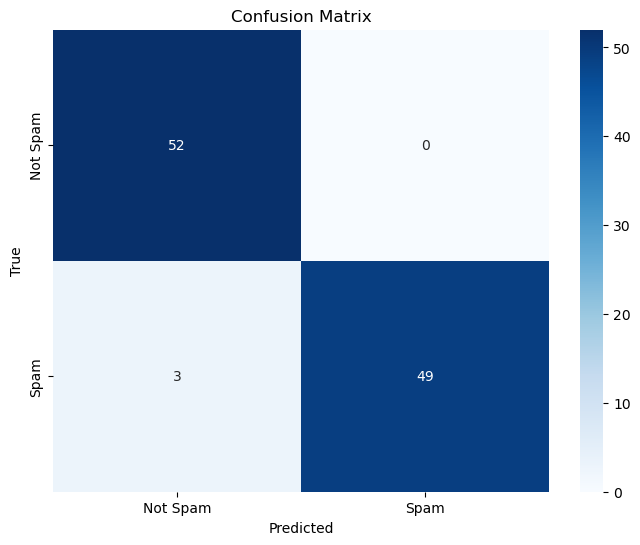

In [67]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [68]:
# Example emails for prediction
emails = [
    'Hey mohan, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

# Predict using the pipeline
predictions = clf.predict(emails)
print(f'Predictions for example emails: {predictions}')

Predictions for example emails: [0 1]


# Knn for Second dataset


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [22]:
# Load the dataset
df = pd.read_csv('spam2.csv')
df.head()



,Category,Message
0,ham,Can you send me the address of the new restaur...
1,spam,Your order has been shipped. Track it online f...
2,spam,Alert: Your payment method has been declined. ...
3,ham,I had a wonderful time at the party last night...
4,ham,Don't forget about the meeting tomorrow at 10 am.


In [23]:
# Add a binary column 'spam'
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()

,Category,Message,spam
0,ham,Can you send me the address of the new restaur...,0
1,spam,Your order has been shipped. Track it online f...,1
2,spam,Alert: Your payment method has been declined. ...,1
3,ham,I had a wonderful time at the party last night...,0
4,ham,Don't forget about the meeting tomorrow at 10 am.,0


In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.25, random_state=42)

In [25]:
# Define the pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Fit the model
clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

In [26]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [27]:
# Print the metrics
print(f'Model accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Model accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [28]:
# Print detailed classification report
report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'])
print(report)


              precision    recall  f1-score   support

    Not Spam       1.00      1.00      1.00        52
        Spam       1.00      1.00      1.00        52

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



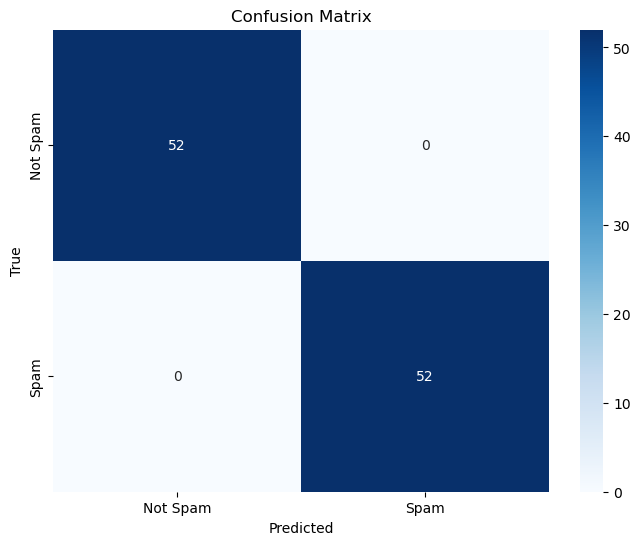

In [29]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Example emails for prediction
emails = [
    'Hey mohan, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

# Predict using the pipeline
predictions = clf.predict(emails)
print(f'Predictions for example emails: {predictions}')

Predictions for example emails: [1 1]


# Decision Tree

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [70]:
# Load the dataset
df = pd.read_csv('spam2.csv')

In [71]:
# Add a binary column 'spam'
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [72]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.25, random_state=42)

In [73]:
# Define the pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Fit the model
clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

In [74]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [75]:
# Print the metrics
print(f'Model accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Model accuracy: 0.9519230769230769
Precision: 0.9272727272727272
Recall: 0.9807692307692307
F1 Score: 0.9532710280373831


In [76]:
# Print detailed classification report
report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'])
print(report)

              precision    recall  f1-score   support

    Not Spam       0.98      0.92      0.95        52
        Spam       0.93      0.98      0.95        52

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



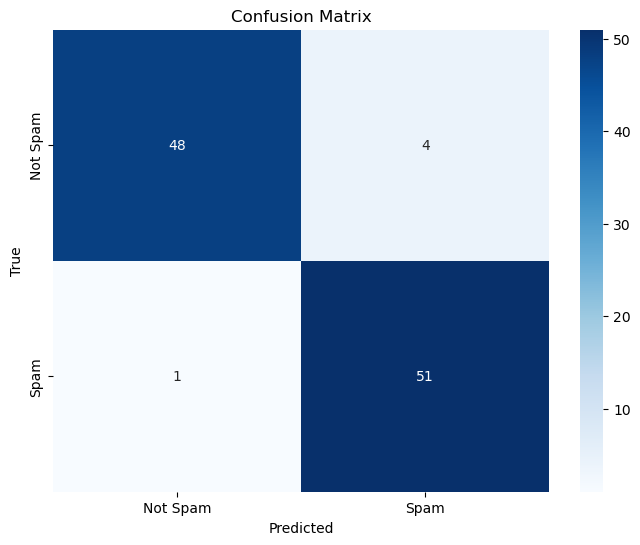

In [77]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [83]:
# Example emails for prediction
emails = [
    'Hey mohan, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

# Predict using the pipeline
predictions = clf.predict(emails)
print(f'Predictions for example emails: {predictions}')

Predictions for example emails: [0 0]
